<a href="https://colab.research.google.com/github/Sandeep45-cyber/CNN/blob/main/cnnfashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [41]:
import tensorflow as tf
from tensorflow import keras

In [43]:
tf.keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [44]:
fashion_mnist = keras.datasets.fashion_mnist
(xtrain_f,ytrain_f),(xtest,ytest) = fashion_mnist.load_data()          

In [45]:
class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [46]:
xtrain_f = xtrain_f.reshape((60000,28,28,1))
xtest = xtest.reshape((10000,28,28,1 ))

In [47]:
xtrain_n = xtrain_f/255.
xtest_n = xtest/255.

In [48]:
x_valid,xtrain = xtrain_n[:5000],xtrain_n[5000:]
y_valid,ytrain = ytrain_f[:5000],ytrain_f[5000:]
xtest = xtest_n

In [58]:
np.random.seed(50)
tf.random.set_seed(50)

In [61]:
model =keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (4, 4), strides=1, padding = 'valid', activation = 'relu',input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [62]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [63]:
model_history = model.fit(xtrain,ytrain,epochs=15,batch_size=64,
                    validation_data=(x_valid,y_valid))

Epoch 1/15
860/860 [==============================] - 33s 39ms/step - loss: 0.8922 - accuracy: 0.7029 - val_loss: 0.6196 - val_accuracy: 0.7602
Epoch 2/15
860/860 [==============================] - 33s 38ms/step - loss: 0.5525 - accuracy: 0.7973 - val_loss: 0.5868 - val_accuracy: 0.7758
Epoch 3/15
860/860 [==============================] - 32s 38ms/step - loss: 0.4912 - accuracy: 0.8218 - val_loss: 0.5002 - val_accuracy: 0.8142
Epoch 4/15
860/860 [==============================] - 32s 38ms/step - loss: 0.4528 - accuracy: 0.8373 - val_loss: 0.6033 - val_accuracy: 0.7828
Epoch 5/15
860/860 [==============================] - 32s 38ms/step - loss: 0.4261 - accuracy: 0.8472 - val_loss: 0.4121 - val_accuracy: 0.8536
Epoch 6/15
860/860 [==============================] - 32s 38ms/step - loss: 0.4015 - accuracy: 0.8562 - val_loss: 0.3855 - val_accuracy: 0.8662
Epoch 7/15
860/860 [==============================] - 32s 38ms/step - loss: 0.3813 - accuracy: 0.8633 - val_loss: 0.3732 - val_accuracy:

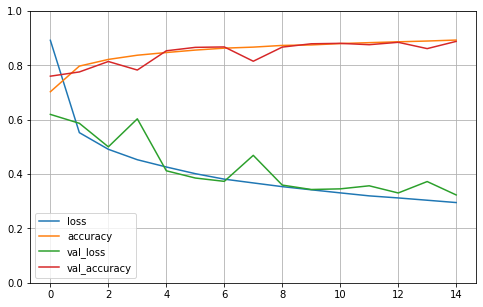

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 300)               1382700   
_________________________________________________________________
dense_31 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1010      
Total params: 1,414,354
Trainable params: 1,414,354
Non-trainable params: 0
___________________________________________

In [66]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
model.summary()

In [73]:
e = model.evaluate(xtest_n,ytest)
e

313/313 [==============================] - 2s 7ms/step - loss: 0.3408 - accuracy: 0.8752


[0.3407987058162689, 0.8751999735832214]

In [74]:
x_new = xtest[:5]

In [75]:
yprediction = model.predict_classes(x_new)
yprediction

array([9, 2, 1, 1, 6])

In [76]:
ytest[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

AxesImage(54,36;334.8x217.44)


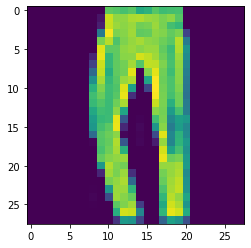

In [77]:
print(plt.imshow(xtest[5].reshape((28,28))))

In [ ]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [ ]:
del model